# $t$-test: Basketball player height

date
: 2021-04-15

In [1]:
from src.data import Load
from scipy.stats import t, ttest_1samp, probplot, normaltest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the sample
sample = Load.basketball()

## Summary

This report is concerned with addressing the question of whether the height of professional basketball players in the USA was equal to 82in.
Data on the height of 19 basketball players was obtained (1) and analysed using a normal model.
We found moderate evidence against the null hypothesis that the height of basketball players is equal to 82in.

## Introduction

The height of 19 professional basketball players in the USA was measured and catalogued in unit inches (in).
This report is interested in whether or not the expected height of a professional basketball player is equal to 82in.
The data used for this analysis was taken from **Reference**.

## Method

The analysis is based up a one sample test of a population mean.
The data was first checked for normality using a normal probability plot.
(This is not shown.)
A 95% $t$-interval was then calculated a $t$-test was carried out to test the null hypothesis that expected height of a professional basketball player is equal to 82in.
All analyses was carried out using **Python** (see Appendix I forthe scripts run).

## Results

A frequency histogram of the sample of heights is plotted below.

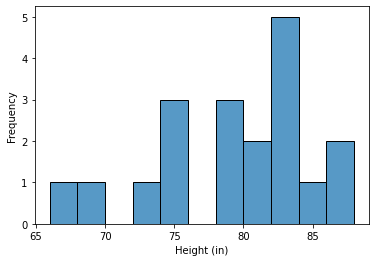

In [3]:
ax = sns.histplot(data=sample, x="Height", binwidth=2)
ax.set(xlabel="Height (in)", ylabel="Frequency")
plt.show()

The expected height of a professional basketball player was 78.9in, with 95% $t$-interval (76.2, 81.7).
A $t$-test of the null hypothesis of the expected height of a professional basketball player in the USA being 82in gave $t \simeq$ 2.34 on 18 degrees of freedom, with $p$-value of 0.0311.

## Discussion

With a $0.01 < p \leq 0.05$, we conclude that there is moderate evidence against the null hypothesis that the expected height of a professional basketball player in the USA is 82in.
Based on the $t$-interval, it seems like that expected height is less than 82in.

## Appendix I: Calculations

This section contains the **Python** used to write the report.

In [5]:
# summary table
sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,19.0,78.947368,5.690867,66.0,75.0,80.0,83.0,87.0


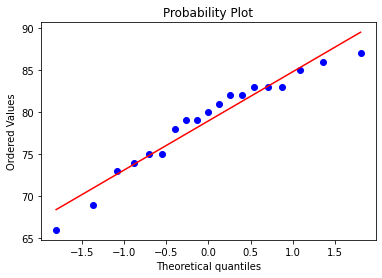

In [4]:
# normal probability plot
f, ax = plt.subplots()
res = probplot(x=sample["Height"], plot=ax)

In [6]:
# declare sampling distribution of the mean
sampling_dist = t(
    df=sample["Height"].size-1,
    loc=sample["Height"].mean(),
    scale=sample["Height"].std()/(sample["Height"].size**0.5)
)

# get ci95 attendance
sampling_dist.interval(0.95)

(76.20445842501887, 81.69027841708639)

In [7]:
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': re

In [8]:
# t-test
ttest_1samp(
    a=sample["Height"],
    popmean=82,
    alternative="two-sided"
)

Ttest_1sampResult(statistic=-2.33815217204348, pvalue=0.031122547460661357)